# ODEs in Python

Solving Ordinary Differential Equations in Python is similar to other languages is done by some sort of numerical method. Fortunately for us, Python and other high-level languages such as MATLAB take away much of the leg work required to solve a differential equation and allow us to get to the heart of a problem.

Although many First-Order ODEs have analytical solutions, we'll begin here considering the syntax for ODE solvers in many languages is tricky.

## The RL Circuit

A problem that is often presented in a introductory Physics class is that of the RL circuit (which is short for a resistor-inductor circuit). The equation for current in just such a circuit is

\begin{equation}
    L \frac{d I}{d t} + R I = \mathcal{E}.
\end{equation}

The solution to this equation is readily solvable to show

\begin{equation}
    I = \frac{\mathcal{E}}{R} \left( 1 - e^{-t/\tau} \right)
\end{equation}

where $\tau=L/R$ and the initial current is assumed to be zero.

## ODEs in Python

In this class, we will make use for the [scipy.integrate toolbox](https://docs.scipy.org/doc/scipy/reference/integrate.html). Primarily, we will be accessing the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) (for *initial* value problems) and the [solve_bvp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html#scipy.integrate.solve_bvp) (for *boundary* value problems).
Through these two functions, Scipy seeks the best type of solver for a particular system. We'll import these and other necessary elements below.

In [1]:
# Python Imports

# 3rd Party Numerical Imports
import numpy as np
from scipy.integrate import solve_ivp as ivp

# 3rd Party Plotting Utilities
from matplotlib import pyplot as plt

In general, require the user to do some algrbra to get a differential equation into a set of equations that describe the derivatives. Understanding that this is difficult to comprehend as a simple statement, we'll demonstrate with the RL differential equation by solving for the derivative. First, we'll get every term in units of current by dividing by $R$.

\begin{equation}
    \frac{L}{R} \frac{d I}{d t} + I = \frac{\mathcal{E}}{R}
\end{equation}

which then we can rewrite as

\begin{equation}
    \frac{d I}{d t} = \frac{R}{L} \left( \frac{\mathcal{E}}{R} - I \right)
\end{equation}

or

\begin{equation}
    \frac{d I}{d t} = \frac{I_0 - I}{\tau}
\end{equation}

Now, the ODE solver in Python expects as its first argument a function that packages all the necessary information about the problem we are trying to solve. And, the specified function is meant to take the independent variable as the first argument ($t$ in this case), the dependent variables as a tuple in the second argument ($I$ in this case) and any other variables after that. To see this visually, check the example and input below.

```python
def odefunc(indepVar, depVars, *otherArgs)
```

Fortunately for us, First-Order ODEs only have one independent and one dependent variable which makes the function easier to write.

In [2]:
# The RL Equation
def rleq(t, current, emf, resist, induct):
    
    # Simply return the RHS of the Equation shown above
    return (emf - resist*current)/induct

At this point, we are ready to begin testing this equation against different initial conditions. Before doing so, let's take a look at the necessary arguments for Scipy's IVP solver. Their documentation states that the function call looks like

```python
solve_ivp(odefunc, tSpan, y0, args=None, tEval=None)
```

The function call takes other arguments which we will not utilize here. However, those listed above are explained below.

* `odefunc`: This represents the name of the function to be evaluated. The IVP solver will call this function to create the solution.
* `tSpan`: This is meant to be a two-tuple meant to represent the start and stop times.
* `y0`: The initial condition(s) of the system as a tuple or list
* `args`: A tuple of arguments meant to be passed on to the `odefunc`. Note: **they must be in the same order as they appear in the `odefunc`**.
* `tEval`: Used to specify specific times to evaluate.

Now that we're aware of these, let's solve the charging problem under various initial conditions.

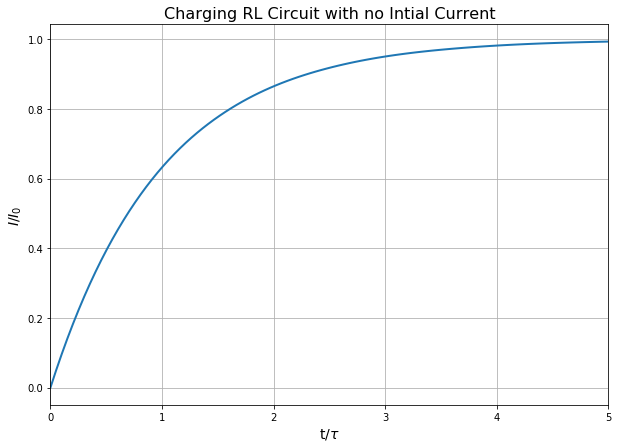

In [3]:
# Set the values of the variables
# We'll set everything to 1 to allow for greater numerical precision.
R = E = L = 1

# Set the initial value of the current
# Assumed to be in units of I/I0
# Keep in mind that Scipy expects a list even if there's only one value
I0 = [0]

# Set Time Specs
tSpan = (0, 5)
tEval = np.linspace(tSpan[0], tSpan[1], 100)

# Solve the Problem
sol = ivp(rleq, tSpan, I0, args=(E, R, L), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('t/$\\tau$', fontsize=14)
_ = ax.set_ylabel('$I/I_0$', fontsize=14)
_ = ax.set_title('Charging RL Circuit with no Intial Current', fontsize=16)
_ = ax.grid(True)

Now, let's assume that the initial current is twice that than the current carrying capacity of the emf.

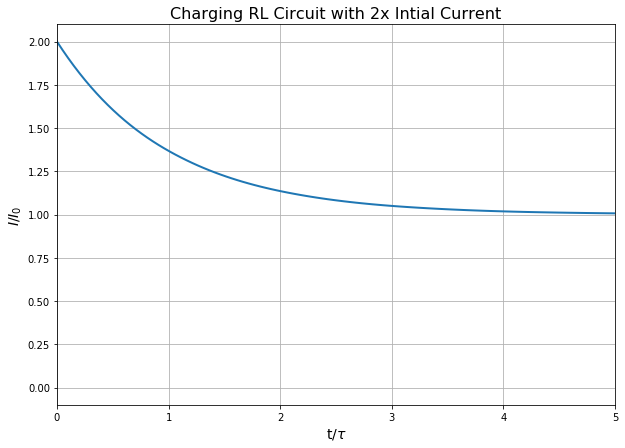

In [4]:
# Set the values of the variables
# We'll set everything to 1 to allow for greater numerical precision.
R = E = L = 1

# Set the initial value of the current
# Assumed to be in units of I/I0
# Keep in mind that Scipy expects a list even if there's only one value
I0 = [2]  # Note the change here

# Set Time Specs
tSpan = (0, 5)
tEval = np.linspace(tSpan[0], tSpan[1], 100)

# Solve the Problem
sol = ivp(rleq, tSpan, I0, args=(E, R, L), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2)
_ = ax.set_xlim(tSpan)
_ = ax.set_ylim(-0.1, 2.1)
_ = ax.set_xlabel('t/$\\tau$', fontsize=14)
_ = ax.set_ylabel('$I/I_0$', fontsize=14)
_ = ax.set_title('Charging RL Circuit with 2x Intial Current', fontsize=16)
_ = ax.grid(True)

Likewise, we can solve the discharging equation where we assume the emf has been removed from the system and that the current begins with some value $I_0 = \mathcal{E}/R$.

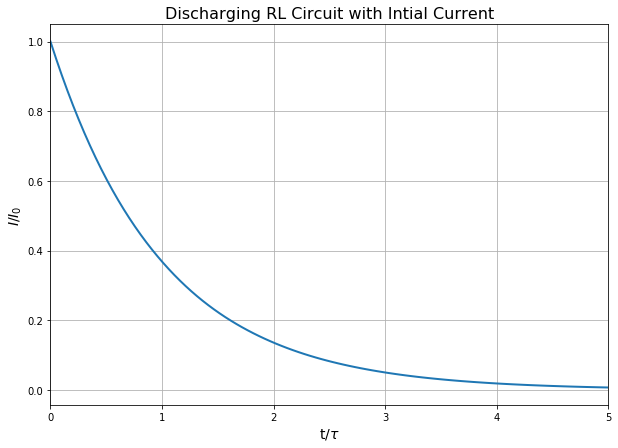

In [5]:
# Set the values of the variables
# We'll set everything to 1 to allow for greater numerical precision.
R = L = 1
E = 0  # Note the change here

# Set the initial value of the current
# Assumed to be in units of I/I0
# Keep in mind that Scipy expects a list even if there's only one value
I0 = [1]  # Note the change here

# Set Time Specs
tSpan = (0, 5)
tEval = np.linspace(tSpan[0], tSpan[1], 100)

# Solve the Problem
sol = ivp(rleq, tSpan, I0, args=(E, R, L), t_eval=tEval)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(sol.t, sol.y[0], linewidth=2)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('t/$\\tau$', fontsize=14)
_ = ax.set_ylabel('$I/I_0$', fontsize=14)
_ = ax.set_title('Discharging RL Circuit with Intial Current', fontsize=16)
_ = ax.grid(True)

## Coupled, First-Order Differential Equations

When it comes to solving coupled or high-order differential equations, the functions and their calls become a little more complicated. Now, the dependent variables must be accessed as a list within the function call. To demonstrate, we'll use the same problem within the Scipy documentation: the Lotka-Volterra (Predator-Prey) Equations which are written as

\begin{align}
    \frac{d x}{d t} &= \alpha x - \beta x y \\
    \frac{d x}{d t} &= \delta x y - \gamma y
\end{align}

where $x$ represents the number or prey and $y$ represents the number of predators.

Fortunately for us, these equations are already in a form that Scipy will accept. Therefore, all we have to do is program it into our system.

In [6]:
# The Predator-Prey Equation
def lveq(t: float, orgNums: tuple, a: float, b: float, c: float, d: float):
    
    # Unpack
    prey, pred = orgNums
    
    # Return the Solutions
    sol = (
        a*prey - b*prey*pred,
        d*pred*prey - c*pred
    )
    return sol

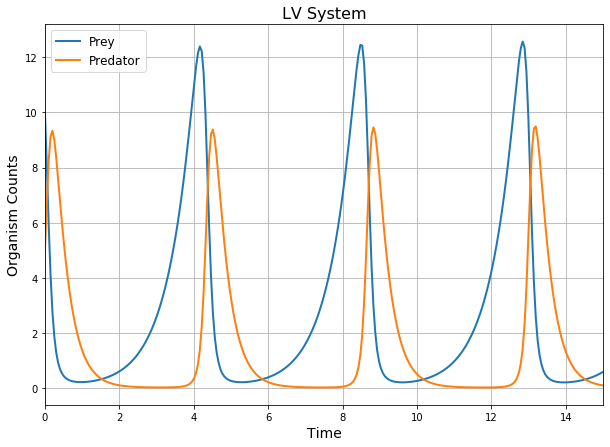

In [7]:
# Set the values of the variables
# Varibles set based on Scipy docs
a = 1.5
b = 1.0
c = 3.0
d = 1.0
args = (a, b, c, d)

# Set the initial value of the current
# Assumed to be in units of I/I0
# Keep in mind that Scipy expects a list even if there's only one value
initOrgCnts = [10, 5]

# Set Time Specs
tSpan = (0, 15)
tEval = np.linspace(tSpan[0], tSpan[1], 300)

# Solve the Problem
sol = ivp(lveq, tSpan, initOrgCnts, args=args, dense_output=True)

# Plot the Solution
fig, ax = plt.subplots(figsize=(10, 7))
_ = ax.plot(tEval, sol.sol(tEval).T, linewidth=2)
_ = ax.set_xlim(tSpan)
_ = ax.set_xlabel('Time', fontsize=14)
_ = ax.set_ylabel('Organism Counts', fontsize=14)
_ = ax.set_title('LV System', fontsize=16)
_ = ax.grid(True)
_ = ax.legend(['Prey', 'Predator'], fontsize=12)

## Assignment

### First Order Equation

Find a numerical solution to the differential equation

\begin{equation}
    2 \frac{d y}{d t} - \frac{y}{t} - \gamma \frac{t^2}{y} = 0
\end{equation}

with the initial condition $y(1) = 2$ and $\gamma = 1$. Plot this against the known solution

\begin{equation}
    y(t) = \sqrt{\frac{x^3 + 7x}{2}}
\end{equation}

Write the function for Scipy below.

Write the code to solve the equation here.

### First Order Coupled Equations

When tanks of fluid are connected to each other such that the water is cycled through the system, we also get coupled differential equations. Your assignment is to solve the following differential equations numerically which represent the flow of water from one tank to another.

\begin{align}
    \dot{x}_1 &= -a x_1         + c x_3, \\
    \dot{x}_2 &=  a x_1 - b x_2,         \\
    \dot{x}_3 &=          b x_2 - c x_3
\end{align}

for $a=1/6$, $b=1/3$ and $c=1/6$. Also, the initial conditions for the system are $x_1(0) = 0$, $x_2(0) = 2$ and $x_3(0) = 3$.

And write the code to solve the differential equation below.

If you solved/setup this problem correctly, then you should find that that fluid in each tank comes to an equilibrium point about 15 seconds in and that this equilibrium should have ratio $2:1:2$ for $x_1:x_2:x_3$.